In [1]:
#https://matplotlib.org/gallery/color/named_colors.html
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load the data
path = "/content/oil_exxon.xlsx"
price_data = pd.read_excel(path)

# set the index equal to the date column & then drop the old date column
price_data.index = pd.to_datetime(price_data['date'])
price_data = price_data.drop(['date'], axis = 1)

# print the first five rows
price_data.head()

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [3]:
# check the data types, in this case everything looks fine no changes need to be made.
price_data.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [4]:
# define the new name.
new_column_names = {'exon_price':'exxon_price'}

# rename the column
price_data = price_data.rename(columns = new_column_names)
price_data.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [5]:
# check for missing values
display(price_data.isna().any())

# drop any missing values
price_data = price_data.dropna()

# let's check to make sure they've all been removed.
price_data.isna().any()

exxon_price    False
oil_price       True
dtype: bool

exxon_price    False
oil_price      False
dtype: bool

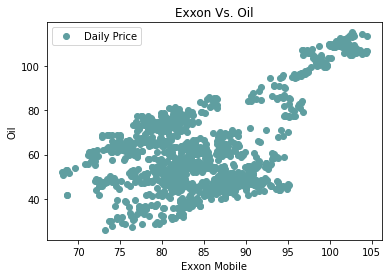

In [6]:

# define the x & y data.
x = price_data['exxon_price']
y = price_data['oil_price']

# create the scatter plot.
plt.plot(x, y, 'o', color ='cadetblue', label = 'Daily Price')

# make sure it's formatted.
plt.title("Exxon Vs. Oil")
plt.xlabel("Exxon Mobile")
plt.ylabel("Oil")
plt.legend()

plt.show()

In [7]:
# let's measure that correlation
price_data.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


In [8]:
# let's take a look at a statistical summary.
price_data.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60b260ced0>,
      dtype=object)

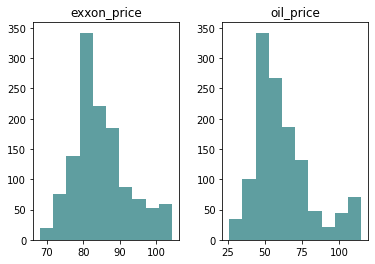

In [9]:
price_data.hist(grid = False, color = 'cadetblue')

In [10]:
# calculate the excess kurtosis using the fisher method. The alternative is Pearson which calculates regular kurtosis.
exxon_kurtosis = kurtosis(price_data['exxon_price'], fisher = True)
oil_kurtosis = kurtosis(price_data['oil_price'], fisher = True)

# calculate the skewness
exxon_skew = skew(price_data['exxon_price'])
oil_skew = skew(price_data['oil_price'])

display("Exxon Excess Kurtosis: {:.2}".format(exxon_kurtosis))  # this looks fine
display("Oil Excess Kurtosis: {:.2}".format(oil_kurtosis))      # this looks fine

display("Exxon Skew: {:.2}".format(exxon_skew))          # moderately skewed
display("Oil Skew: {:.2}".format(oil_skew))              # moderately skewed, it's a little high but we will accept it.

'Exxon Excess Kurtosis: 0.088'

'Oil Excess Kurtosis: 0.53'

'Exxon Skew: 0.66'

'Oil Skew: 1.0'

In [11]:
# perform a kurtosis test
display('Exxon')
display(stats.kurtosistest(price_data['exxon_price']))
display('Oil')
display(stats.kurtosistest(price_data['oil_price']))

# perform a skew test
display('Exxon')
display(stats.skewtest(price_data['exxon_price']))
display('Oil')
display(stats.skewtest(price_data['oil_price']))

'Exxon'

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)

'Oil'

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

'Exxon'

SkewtestResult(statistic=8.770169400598549, pvalue=1.7839768456341654e-18)

'Oil'

SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159925e-35)

In [12]:
# define our input variable (X) & output variable.
Y = price_data.drop('oil_price', axis = 1)
X = price_data[['oil_price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [13]:

# create a Linear Regression model object.
regression_model = LinearRegression()

# pass through the X_train & y_train data set.
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# let's grab the coefficient of our model and the intercept.
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

The Coefficient for our model is 0.24
The intercept for our model is 70.01


In [15]:
# let's test a prediction
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

The predicted value is 85.95


In [16]:
# Get multiple predictions.
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[82.23530265],
       [82.87451035],
       [81.48245802],
       [78.9256272 ],
       [84.01324704]])

In [17]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model.
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

In [18]:

# make some confidence intervals, 95% by default.
est.conf_int()

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


In [19]:
# estimate the p-values.
est.pvalues

const         0.000000e+00
oil_price    1.423529e-123
dtype: float64

In [20]:
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 38.4
MAE 5.03
RMSE 6.2


In [21]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.31


In [22]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Sat, 18 Sep 2021   Prob (F-statistic):          1.42e-123
Time:                        19:52:21   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

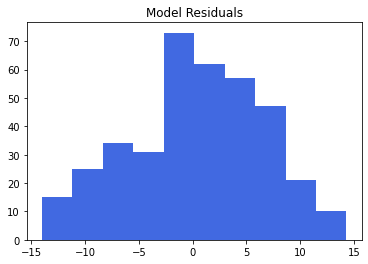

In [23]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

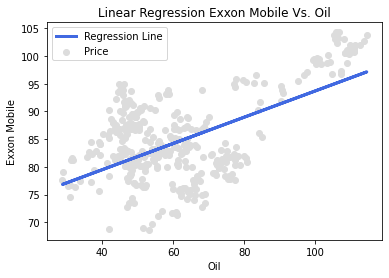

Oil coefficient:0.24
Mean squared error: 38.44
Root Mean squared error: 6.2
R2 score: 0.31


In [24]:
# Plot outputs
plt.scatter(X_test, y_test,  color='gainsboro', label = 'Price')
plt.plot(X_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Linear Regression Exxon Mobile Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.legend()
plt.show()

# The coefficients
print('Oil coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

In [25]:
import pickle

# pickle the model.
with open('my_linear_regression.sav','wb') as f:
     pickle.dump(regression_model,f)

# load it back in.
with open('my_linear_regression.sav', 'rb') as pickle_file:
     regression_model_2 = pickle.load(pickle_file)

# make a new prediction.
regression_model_2.predict([[67.33]])

array([[85.94980965]])